<a href="https://colab.research.google.com/github/ninad-kul/Opencv-Image-processing/blob/main/image_processing_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('\content\drive')

TIMEOUT: ignored

In [ ]:
import cv2
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
from glob import glob
import os

Display image

(720, 1280, 3)


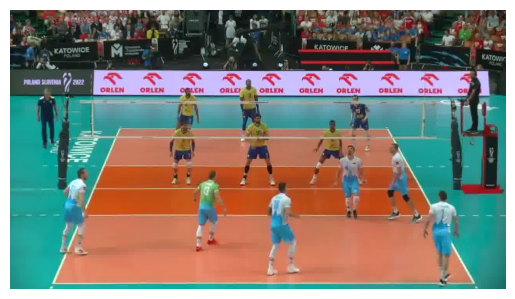

In [ ]:
frames = glob('/content/contentdrive/MyDrive/rally_34/*.jpg')
frame_csv = glob('/content/contentdrive/MyDrive/rally_34/*.csv')

def show_image(frames,i):
    img = cv2.imread(frames[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

img1 = cv2.imread(frames[249])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis("off")
print(img1.shape)

Color to different players

In [ ]:
color_dict = {
    1: (255, 0, 0),
    2: (0, 255, 0),
    3: (0, 0, 255),
    4: (255, 255, 0),
    5: (255, 0, 255),
    6: (0, 255, 255),
    7: (200, 0, 0),
    8: (0, 128, 128),
    9: (128, 128, 0),
   10: (255, 69, 0),
   11: (128,0,128),
   12: (0,100,0)
}

In [ ]:
#frames = os.listdir('/content/contentdrive/MyDrive/rally_34/')
#frame_glob = glob('/content/contentdrive/MyDrive/rally_34/*.csv')
#frames.sort()
frame_no = 2

addres = "/content/contentdrive/MyDrive/Spordia/rally_34/1.csv"

print(addres)
print(type(addres))


df1 = pd.read_csv(addres,
                  names = ['y1','y2','x1','x2','player','score'],
                  header=None)
print()
print(df1)



/content/contentdrive/MyDrive/Spordia/rally_34/1.csv
<class 'str'>

       y1     y2      x1      x2  player     score
0   460.0  700.0   884.0   964.0       0  0.944336
1   412.0  648.0   300.0   392.0       1  0.936035
2   339.0  545.0    24.0    92.0       2  0.936035
3   448.0  672.0   599.0   689.0       3  0.935059
4   165.0  316.0    66.0   116.0       4  0.914551
5   154.0  321.0  1162.0  1216.0       5  0.912109
6   494.0  670.0   954.0  1091.0       6  0.909668
7   318.0  522.0   704.0   774.0       7  0.904785
8   259.0  457.0   596.0   702.0       8  0.902344
9   354.0  508.0   976.0  1028.0       9  0.888184
10  241.0  429.0   546.0   612.0      10  0.860840
11   93.0  234.0   524.0   568.0      11  0.787109
12  210.0  331.0   726.0   762.0      12  0.686035
13   83.0  157.0   997.0  1035.0      13  0.297607


Annotating the images

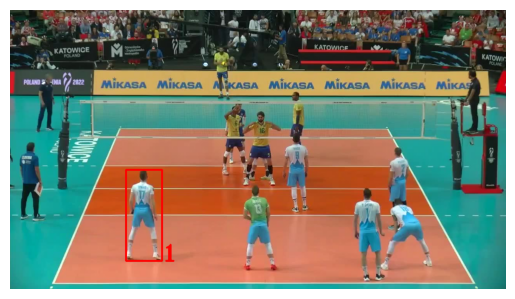

In [ ]:
player_no = 1
frame_no = 2

fr_adrs = "/content/contentdrive/MyDrive/Spordia/rally_34/"+str(frame_no)+".jpg"
csv_adrs = "/content/contentdrive/MyDrive/Spordia/rally_34/"+str(frame_no)+".csv"
df1 = pd.read_csv(csv_adrs,
                  names = ['y1','y2','x1','x2','player','score'],
                  header=None)
x1 = int(df1._get_value(player_no,'x1'))
x2 = int(df1._get_value(player_no,'x2'))
y1 = int(df1._get_value(player_no,'y1'))
y2 = int(df1._get_value(player_no,'y2'))
player = int(df1._get_value(player_no,'player'))
img2 = cv2.imread(fr_adrs)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.rectangle(img2, (x1,y1), (x2,y2), color_dict.get(player_no), 3)
font = cv2.FONT_HERSHEY_TRIPLEX
img2 = cv2.putText(img2, str(player), (x2,y2), font, 2, color_dict.get(player_no),3)
plt.imshow(img2)
plt.axis("off")
plt.show()

Creating Video from images


In [ ]:
def annot_image(player_no,frame_no,color_dict):
    fr_adrs = "/content/contentdrive/MyDrive/Spordia/rally_34/"+str(frame_no)+".jpg"
    csv_adrs = "/content/contentdrive/MyDrive/Sporida/rally_34/"+str(frame_no)+".csv"

    df1 = pd.read_csv(csv_adrs,
                  names = ['y1','y2','x1','x2','player','score'],
                  header=None)
    x1 = int(df1._get_value(player_no,'x1'))
    x2 = int(df1._get_value(player_no,'x2'))
    y1 = int(df1._get_value(player_no,'y1'))
    y2 = int(df1._get_value(player_no,'y2'))
    player = int(df1._get_value(player_no,'player'))
    img2 = cv2.imread(fr_adrs)
    #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    img2 = cv2.rectangle(img2, (x2,y2), (x1,y1), color_dict.get(player_no), 3)
    font = cv2.FONT_HERSHEY_TRIPLEX
    img2 = cv2.putText(img2, str(player), (x2,y2), font, 2, color_dict.get(player_no),3)
    return img2

def create_video(player_no,color_dict):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter('out_video_pl4.mp4',fourcc,30,(1280,720))
    for i in range(0,270):
        temp_img = annot_image(player_no,i+1,color_dict)
        video.write(temp_img)
    video.release()
    return video

vid1 = create_video(4,color_dict)





IoU test code

In [ ]:
def area_box(x1,y1,x2,y2):
    return (x2-x1)*(y1-y2)

def area_inters(x1,y1,x2,y2,a1,b1,a2,b2):
    return (x2-a1)*(b1-y2)

def iou(x1,y1,x2,y2,a1,b1,a2,b2):
    return (area_inters(x1,y1,x2,y2,a1,b1,a2,b2)/(area_box(x1,y1,x2,y2)+area_box(a1,b1,a2,b2)-area_inters(x1,y1,x2,y2,a1,b1,a2,b2)))

iou = area_inters(0,110,100,10,10,100,110,0)/(area_box(0,110,100,10)+area_box(10,100,110,0)-area_inters(0,110,100,10,10,100,110,0))
print("IOU = ",iou)

IOU =  0.680672268907563


In [ ]:
play_no = 1
fr_no = 1

csv_crt_adrs = "/content/contentdrive/MyDrive/Spordia/rally_34_corrected/rally_34."+str(play_no)+".detect.corrected.csv"

df = pd.read_csv(csv_crt_adrs)
df = df.rename(columns = {'0':'y1', '1':'y2', '2':'x1', '3':'x2'})
print(df)

     Unnamed: 0  player_id  frame_no     y1     y2     x1     x2  bbox_id
0             0          1         1    NaN    NaN    NaN    NaN      NaN
1             1          1         2  476.0  644.0  296.0  393.0      2.0
2             2          1         3  468.0  641.0  297.0  392.0      2.0
3             3          1         4  477.0  646.0  296.0  391.0      4.0
4             4          1         5  488.0  646.0  296.0  391.0      2.0
..          ...        ...       ...    ...    ...    ...    ...      ...
265         265          1       266  361.0  503.0  452.0  510.0      7.0
266         266          1       267  357.0  504.0  455.0  512.0      5.0
267         267          1       268  353.0  506.0  458.0  518.0      4.0
268         268          1       269  362.0  503.0  458.0  523.0      2.0
269         269          1       270  361.0  504.0  459.0  523.0      3.0

[270 rows x 8 columns]


In [ ]:
def cal_iou(frame_no, play_no):
    csv_crct = "/content/contentdrive/MyDrive/Spordia/rally_34_corrected/rally_34."+str(play_no)+".detect.corrected.csv"
    csv_pred = "/content/contentdrive/MyDrive/Spordia/rally_34/"+str(frame_no)+".csv"
    df_crct = pd.read_csv(csv_crt_adrs)
    df_crct = df.rename(columns = {'0':'y1', '1':'y2', '2':'x1', '3':'x2'})
    df_pred = pd.read_csv(csv_pred,
                          names = ['y1','y2','x1','x2','player','score'],
                          header=None)
    print(df_pred)
    print(df_crct)

    xp1 = (df_pred._get_value(play_no-1,'x1'))
    xp2 = (df_pred._get_value(play_no-1,'x2'))
    yp1 = (df_pred._get_value(play_no-1,'y1'))
    yp2 = (df_pred._get_value(play_no-1,'y2'))

    xc1 = (df_crct._get_value(frame_no-1,'x1'))
    xc2 = (df_crct._get_value(frame_no-1,'x2'))
    yc1 = (df_crct._get_value(frame_no-1,'y1'))
    yc2 = (df_crct._get_value(frame_no-1,'y2'))
    print(xc1,xc2,yc1,yc2)

cal_iou(1,1)

       y1     y2      x1      x2  player     score
0   460.0  700.0   884.0   964.0       0  0.944336
1   412.0  648.0   300.0   392.0       1  0.936035
2   339.0  545.0    24.0    92.0       2  0.936035
3   448.0  672.0   599.0   689.0       3  0.935059
4   165.0  316.0    66.0   116.0       4  0.914551
5   154.0  321.0  1162.0  1216.0       5  0.912109
6   494.0  670.0   954.0  1091.0       6  0.909668
7   318.0  522.0   704.0   774.0       7  0.904785
8   259.0  457.0   596.0   702.0       8  0.902344
9   354.0  508.0   976.0  1028.0       9  0.888184
10  241.0  429.0   546.0   612.0      10  0.860840
11   93.0  234.0   524.0   568.0      11  0.787109
12  210.0  331.0   726.0   762.0      12  0.686035
13   83.0  157.0   997.0  1035.0      13  0.297607
     Unnamed: 0  player_id  frame_no     y1     y2     x1     x2  bbox_id
0             0          1         1    NaN    NaN    NaN    NaN      NaN
1             1          1         2  476.0  644.0  296.0  393.0      2.0
2            